In [1]:
# Get parent directory and add to sys.path
import os; import sys
import numpy as np
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [ ]:
# MPC import
from Deliverable_5_2.MPCVelControl import MPCVelControl

from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

Maximum invariant set successfully computed after 15 iterations for X MPC.


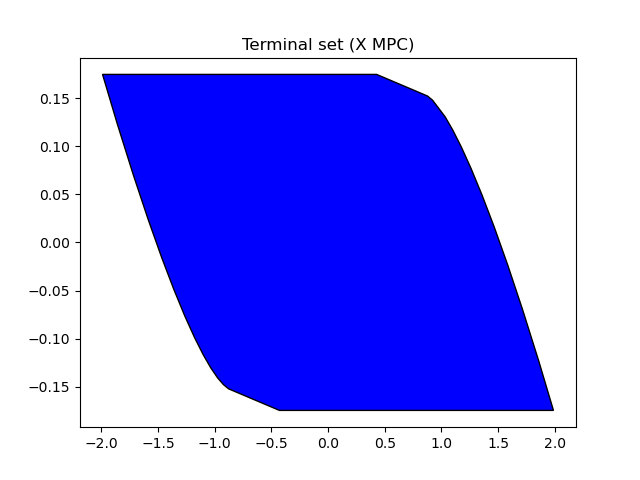

Maximum invariant set successfully computed after 15 iterations for Y MPC.


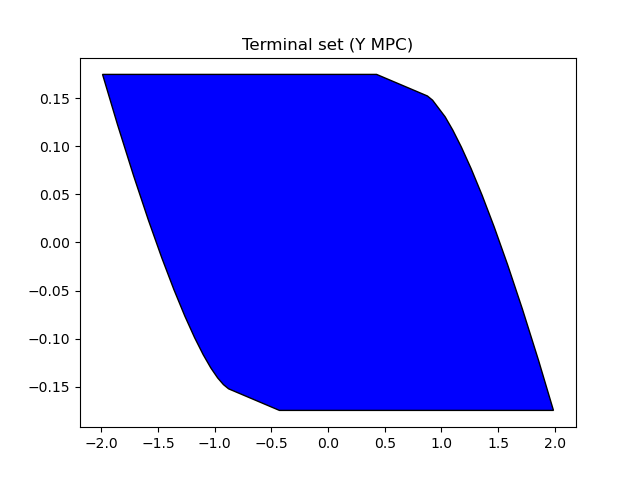

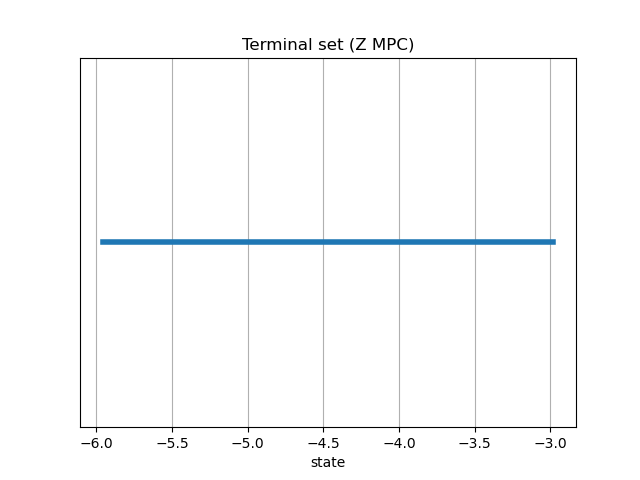

L: [[ 0.7       ]
 [16.31654089]]
Maximum invariant set successfully computed after 46 iterations for Roll MPC.


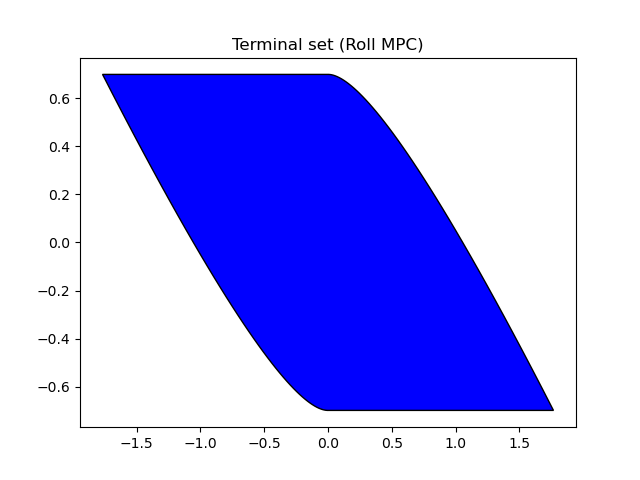

d_estimate: [163.16540893], x_hat: [7.], Pavg: [66.66666667]
Fuel left: 1.00 kg, 
d_estimate: [208.6080193], x_hat: [9.95342479], Pavg: [40.]
Fuel left: 1.00 kg, 
d_estimate: [202.41537692], x_hat: [11.02584037], Pavg: [40.]
Fuel left: 0.99 kg, 
d_estimate: [175.53389808], x_hat: [11.16513521], Pavg: [40.]
Fuel left: 0.99 kg, 
MPC problem: user_limit
[WARN] Input saturated: [-0.26186764] → [-0.26179939]
MPC problem: user_limit
[WARN] Input saturated: [0.26187231] → [0.26179939]
d_estimate: [142.83245684], x_hat: [10.85704656], Pavg: [40.]
Fuel left: 0.99 kg, 
MPC problem: user_limit
[WARN] Input saturated: [-0.26186917] → [-0.26179939]
MPC problem: user_limit
[WARN] Input saturated: [0.26189835] → [0.26179939]
d_estimate: [111.08863848], x_hat: [10.34953838], Pavg: [40.]

 State beta violation: -0.19 < -0.17, 
 State alpha violation: 0.19 > 0.17, Fuel left: 0.99 kg, 
MPC problem: user_limit
MPC problem: user_limit
d_estimate: [83.4756348], x_hat: [9.78578739], Pavg: [40.]

 State beta 

In [7]:
Ts = 0.05
sim_time = 20; H = 5.0
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 10, 0, 0, 1])  # initial state
x_target = np.zeros((12,))

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

# Static mass change and zero fuel rate
rocket.mass = 2.0
rocket.fuel_rate = 0.1
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(mpc, sim_time, H, x0, x_target=x_target, method='nonlinear')

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, Ref=ref[:,:-1], T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol); 

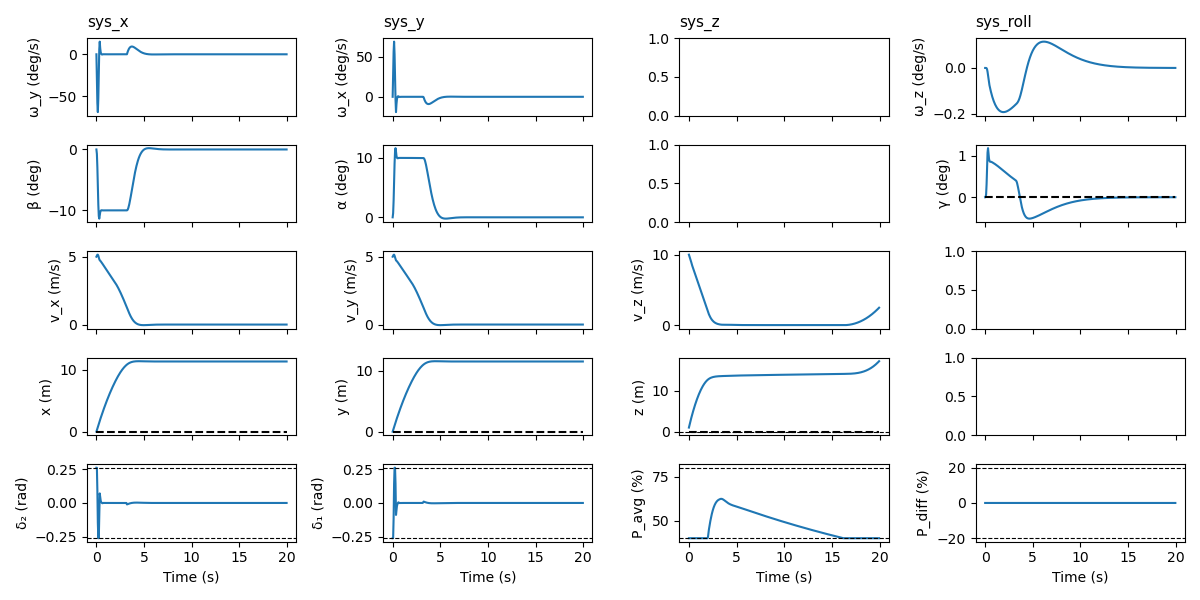

In [6]:
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, ref[:,:-1])